# Medium Size Bikes & Cycling Accessories Organisation's Transactions Data Based Cohort Analysis

***

# Cohort Analysis Basics


> **Understanding the retention rate for the medium size bikes & cycling accessories organisation.** 


A descriptive analytics technique is cohort analysis. Customers are divided into mutually exclusive cohorts, which are then tracked over time. Vanity indicators don't offer the same level of perspective as cohort research. It aids in the deeper interpretation of high-level patterns by supplying metrics around the product and consumer lifecycle.


**Generally there are three majot types of Cohort:**
- Time cohorts : customers who signed up for a product or service during a particular time frame.
- Behavior cohorts : customers who purchased a product or subscribed to a service in the past. 
- Size cohorts : refer to the various sizes of customers who purchase company’s products or services.


However, we will be performing **Cohort Analysis based on Time**. Customers will be divided into acquisition cohorts depending on the month of their first purchase. The cohort index would then be assigned to each of the customer's purchases, which will represent the number of months since the first transaction.



Here, we will be dealing with mainly on monthly basis for 
- transaction_date  
- customer_id
- standard_cost 
- list_price



<div class="alert alert-block alert-info">
<b>Cohort:</b> A cohort is a collection of users who have something in common. A traditional cohort, for example, divides people by the week or month of which they were first acquired. When referring to non-time-dependent groupings, the term segment is often used instead of cohort.
</div>





#### Dataset: [Customer_transaction_dataset](https://www.kaggle.com/archit9406/customer-transaction-dataset)




#### Objective:
-  Finding the percentage of active customers compared to the total number of customers after each month: Customer Segmentations
-  List price monthly cohort view
-  Standard price monthly cohort view

***

# Cohort Analysis  Basics


# Step involved in  Cohort Retention Rate Analysis
###### Click each heading to jump to the section



### 1.  [Data loading and cleaning](#Data-loading-and-cleaning)


### 2. [Assigned the cohorts and calculated the monthly offset](#Assigned-the-cohorts-and-calculated-the-monthly-offset)

**Step 2.1** 

* Truncate date object in into needed one(here we need month so transaction_date)
* Create groupby object with target column ( here, customer_id)
* Transform with a min() function to assign the smallest transaction date in month value to each customer. 

***The result of this process is the acquisition month cohort for each customer i.e. we have assigned the acquisition month cohort to each customer.***


**Step 2.2** 


* Calculate Time offset by extracting integer values of the year, month and day from a datetime() object.
* Calculate the number of months between any transaction and the first transaction for each customer. We will use the TransactionMonth and CohortMonth values to do this.

***The result of this will be cohortIndex i.e, difference between “TransactionMonth ” and “CohortMonth” in terms of the number of months and call the column “cohortIndex”.***

**Step 2.3** 

* Create a groupby object with CohortMonth and CohortIndex.
* Count number of customers in each group by applying pandas nunique() function.
* Reset the index and create a pandas pivot with CohortMonth in the rows, CohortIndex in the columns, and customer_id counts as values. 
 
 
***Result of this will be the table that will serve as the basis for  calculating retention rate  and other matrices as well.***



###  3. [Calculate business metrics: Retention rate](#Calculate-business-metrics:-Retention-rate)

> Retention measures how many customers from each of the cohort have returned in the subsequent months.

* Using the dataframe called cohort_counts we will select the First columns(equals to total number of customer in cohorts)
* Calculate the ratio of how many of these customers came back in the subsequent months.

***The result gives a retention rate.***   

### 4. [Visualizing the retention rate](#Visualizing-the-retention-rate)

* Use seaborn heatmap to visualize thus obtained cohort results.


### 5. [Interpreting the retention rate](#Intrrpreting-the-retention-rate)

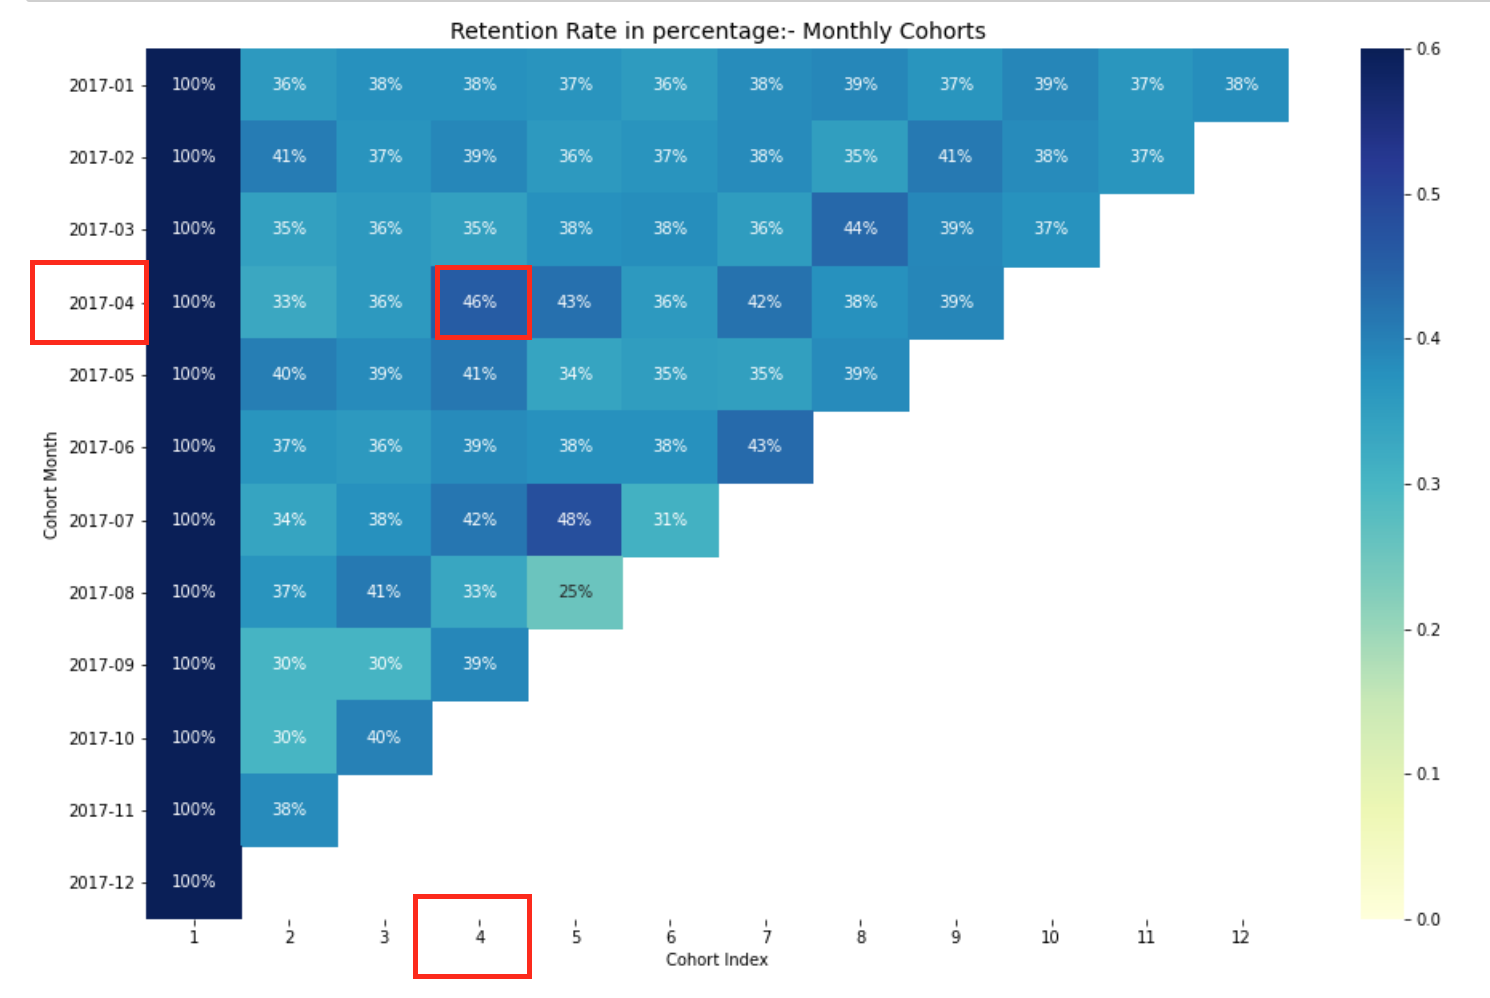

The column highlighted in figure with value as 46% represents, **46% of cohorts which signed in April 2017 were active 4 months later.**

Also, 100% value in all cells in column 1 says that this was the month when customer signed up or did their first transaction and have rate of 100% activity.

 ###  [Average standard cost monthly cohort](#Average-standard-cost-monthly-cohort)
 
 ###  [Average list price monthly cohort](#Average-list-price-monthly-cohort)

***

<div class="alert alert-block alert-info">
<b>After understanding and working with this notebook, you will be able to do:</b> 
    <li>Understand what is cohort and cohort analysis</li>
<li>Handling missing values</li>
    <li> Month extraction from date</li>
<li> Assign cohort to each transaction </li>
<li> Assigning cohort index to each transaction</li>
<li> Calculate number of unique customers in each group </li>
    <li> Create cohort table for retention rate</li>
<li> Visualize  the cohort table using heatmap</li>
    <li> Interpreting the retention rate</li>
<li> Work with other business  matrices</li>
</div>

# Importing Libraries

In [1]:

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

import missingno as msno
from textwrap import wrap

### Data loading and cleaning

In [2]:
# Loading dataset

transaction_df = pd.read_excel('transaction.xlsx')

In [3]:
# View data
transaction_df.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


### Checking and working with missing value with wonderful missingno library


<div class="alert alert-block alert-success">
<b><a href="https://libraries.io/pypi/missingno" target=_blank> Click to read more about missingno library. </a></b> 
   
</div>


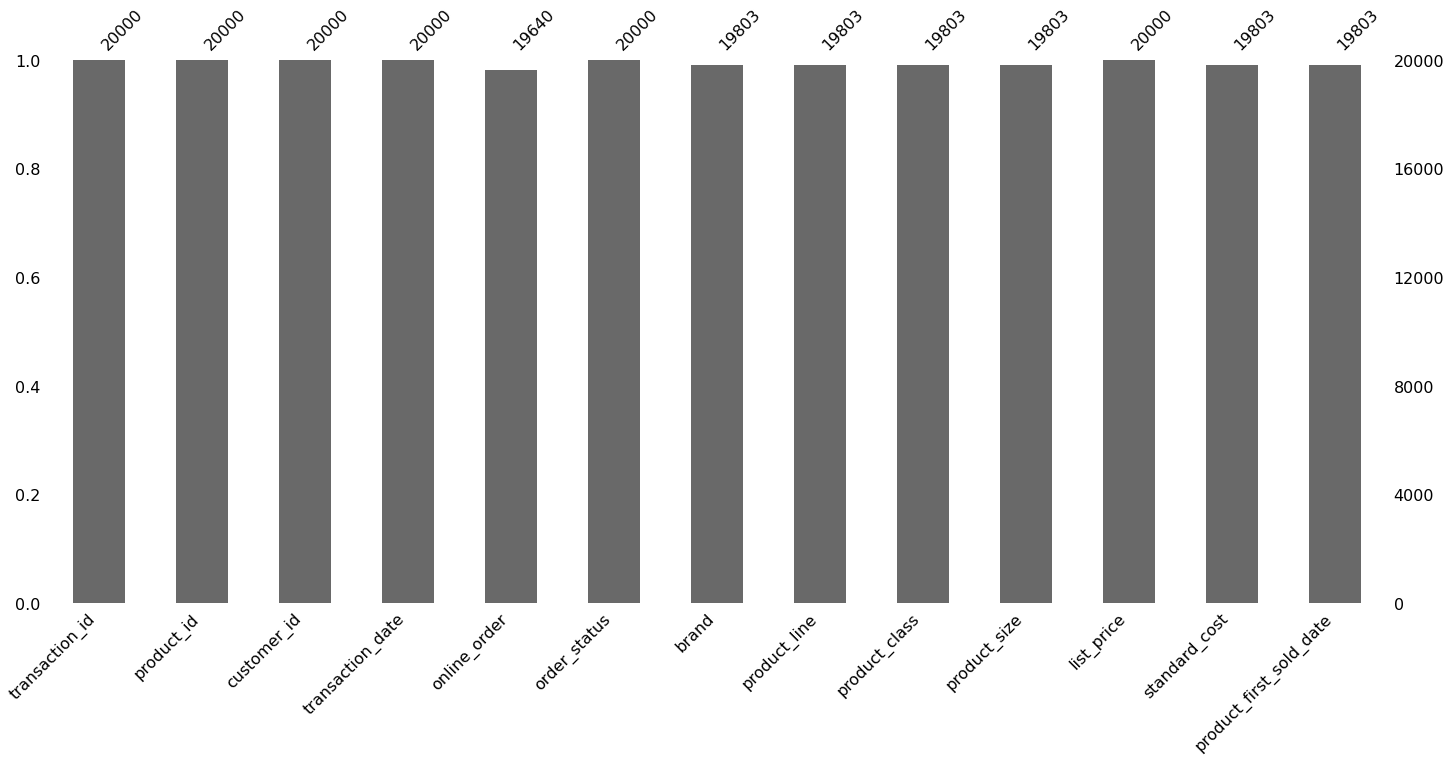

In [4]:

msno.bar(transaction_df)

Here, we see that in each column we need to have 20000 data,  but in colums *online_order, brand, product_line, product_class and so on*, we have some missing values.

Now, further we will inspect missing values using **isnull()function (missingno and isnull() gives same result)**, we  will inspect the dataset and we will replace it with NaN and we will impute it. 

In [5]:

# Inspect missing values in the dataset
print(transaction_df.isnull().values.sum())

# Replace the ' 's with NaN
transaction_df = transaction_df.replace(" ",np.NaN)

# Impute the missing values with mean imputation
transaction_df = transaction_df.fillna(transaction_df.mean())

# Count the number of NaNs in the dataset to verify
print(transaction_df.isnull().values.sum())

1542
788


In [6]:
print(transaction_df.info())
for col in transaction_df.columns:
    # Check if the column is of object type
    if transaction_df[col].dtypes == 'object':
        # Impute with the most frequent value
        transaction_df[col] = transaction_df[col].fillna(transaction_df[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(transaction_df.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               20000 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              20000 non-null float64
product_first_sold_date    20000 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB
None
0


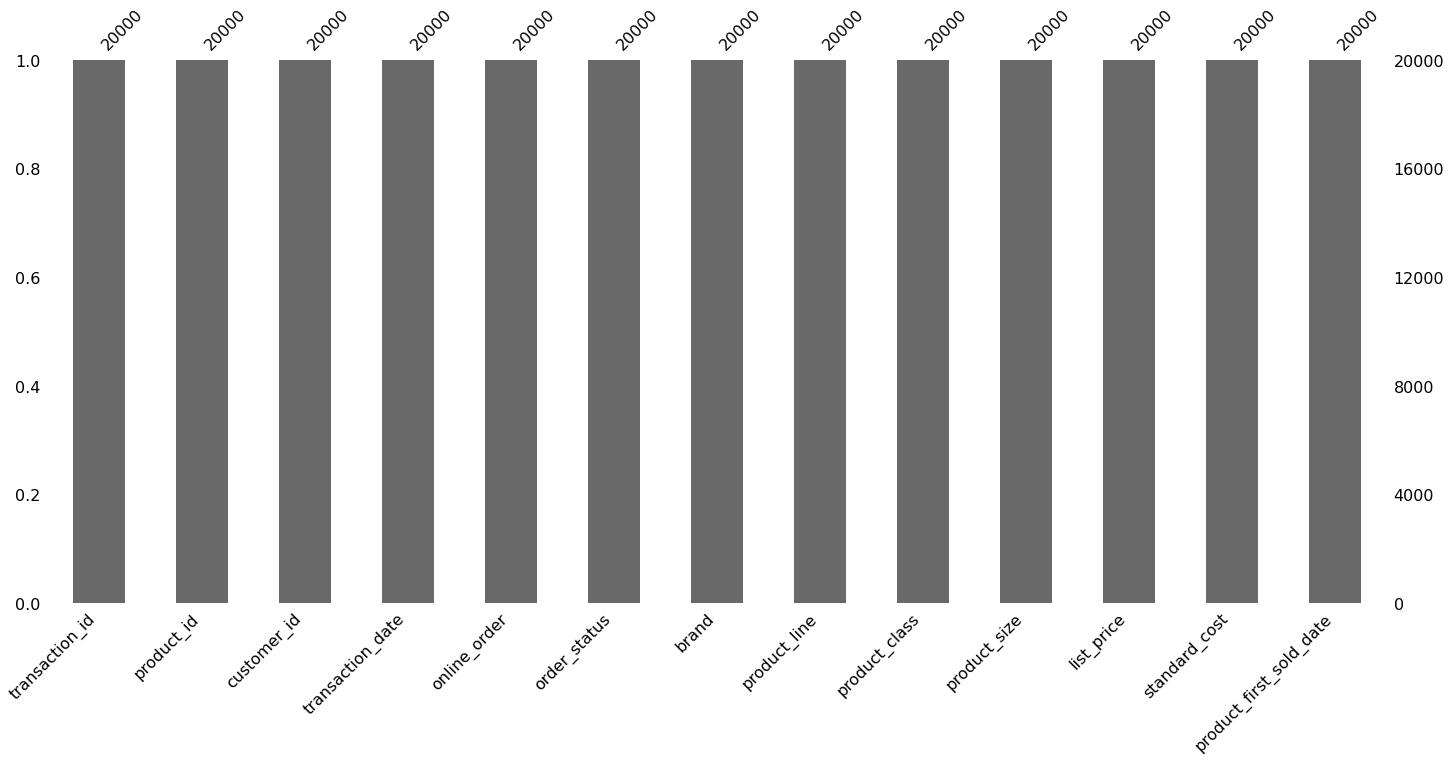

In [7]:
msno.bar(transaction_df)

Now, we see that we have no any missing values. 

In [8]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               20000 non-null float64
order_status               20000 non-null object
brand                      20000 non-null object
product_line               20000 non-null object
product_class              20000 non-null object
product_size               20000 non-null object
list_price                 20000 non-null float64
standard_cost              20000 non-null float64
product_first_sold_date    20000 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


Here we see we have  12 columes(attributes) and 20000 Data Points in dataset

We have 'transaction_date'  in datetime format.


***

As we have completed our data cleaning and understanding, now we will commence the Cohort Analysis.

### Assigned the cohorts and calculated the monthly offset

In [9]:
# A function that will parse the date Time based cohort:  1 day of month
def get_month(x): return dt.datetime(x.year, x.month, 1) 

# Create transaction_date column based on month and store in TransactionMonth
transaction_df['TransactionMonth'] = transaction_df['transaction_date'].apply(get_month) 

# Grouping by customer_id and select the InvoiceMonth value
grouping = transaction_df.groupby('customer_id')['TransactionMonth'] 

# Assigning a minimum InvoiceMonth value to the dataset
transaction_df['CohortMonth'] = grouping.transform('min')

# printing top 5 rows
print(transaction_df.head())

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date TransactionMonth  \
0       71.49     

***

**Calculating  time offset in Month as  Cohort Index** 

Calculating time offset for each transaction allows you to evalauate the metrics for each cohort in a comparable fashion.

First, we will create 6 variables that capture the integer value of years, months and days for Transaction and Cohort Date using the get_date_int() function.




In [11]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

# Getting the integers for date parts from the `InvoiceDay` column
transcation_year, transaction_month, _ = get_date_int(transaction_df, 'TransactionMonth')

# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(transaction_df, 'CohortMonth')


Now we will:
- We will calculate the difference between the Invoice Dates and Cohort dates in years, months separately.
- then calculate the total Months difference between the two. 
- This will be our Months offset or cohort Index, which we will use in the next section to calculate retention rate.

In [13]:
#  Get the  difference in years
years_diff = transcation_year - cohort_year

# Calculate difference in months
months_diff = transaction_month - cohort_month


""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation. 
 """

transaction_df['CohortIndex'] = years_diff * 12 + months_diff  + 1 
print(transaction_df.head(5))

   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard        medium        large   

   list_price  standard_cost  product_first_sold_date TransactionMonth  \
0       71.49     

 Here, at first we create a *groupby()* object with *CohortMonth and CohortIndex* and store it as grouping. 
 
Then, we call this object, select the *customer_id* column and calculate the average.

Then we store the results as *cohort_data*. Then, we reset the index before calling the pivot function to be able to access the columns now stored as indices.
 
Finally, we create a pivot table by passing 
* *CohortMonth* to the index parameter,
* *CohortIndex* to the columns parameter, 
* *customer_id* to the values parameter. 

and rounding it up to 1 digit, and see what we get.

In [14]:
# Counting daily active user from each chort
grouping = transaction_df.groupby(['CohortMonth', 'CohortIndex'])



# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = grouping['customer_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()


 # Assigning column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns ='CohortIndex',
                                 values = 'customer_id')

# Printing top 5 rows of Dataframe
cohort_data.head()



,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1354
1,2017-01-01,2,486
2,2017-01-01,3,508
3,2017-01-01,4,509
4,2017-01-01,5,502


In [15]:
print(cohort_counts.round(1))

CohortIndex      1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                   
2017-01-01   1354.0  486.0  508.0  509.0  502.0  483.0  518.0  529.0  500.0   
2017-02-01    800.0  325.0  298.0  313.0  288.0  298.0  308.0  281.0  329.0   
2017-03-01    484.0  167.0  174.0  167.0  182.0  184.0  172.0  212.0  189.0   
2017-04-01    336.0  111.0  121.0  153.0  143.0  121.0  142.0  126.0  132.0   
2017-05-01    210.0   85.0   81.0   87.0   71.0   74.0   73.0   81.0    NaN   
2017-06-01    122.0   45.0   44.0   47.0   46.0   46.0   53.0    NaN    NaN   
2017-07-01     77.0   26.0   29.0   32.0   37.0   24.0    NaN    NaN    NaN   
2017-08-01     51.0   19.0   21.0   17.0   13.0    NaN    NaN    NaN    NaN   
2017-09-01     23.0    7.0    7.0    9.0    NaN    NaN    NaN    NaN    NaN   
2017-10-01     20.0    6.0    8.0    NaN    NaN    NaN    NaN    NaN    NaN   
2017-11-01     13.0    5.0    NaN    NaN    NaN    N

***

### Calculate business metrics: Retention rate


> The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.

In the this section, we will calculate retention count for each cohort Month paired with cohort Index

Now that we have count of retained customer for each *cohortMonth* and *cohortIndex*. We will calculate retention rate for each Cohort.


We will create a pivot table for this purpose.


In [25]:
"""
Select the first column and store it to cohort_sizes as size of cohort === no. active customer in first day
We will store the 1st column as Cohort size i.e total Number of Customers in that Cohort
"""

cohort_sizes = cohort_counts.iloc[:,0]

"""
We will divide the values in other columns with Cohort Size in order to calculate the retention rate i.e Number of Customers in Each Cohort Index
"""

retention = cohort_counts.divide(cohort_sizes, axis=0)

In [30]:


"""
this matrix has 2 axes: 
x - cohort date (beginning of month); y - cohort maturity (in months)
every cell is a unique count of customer for the x and y

if a customer's last order was in period 2,
they were active in period 0, 1 as well
same for other periods

"""

# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100




CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.6,37.1,35.7,38.3,39.1,36.9,39.2,36.7,38.1
2017-02-01,100.0,40.6,37.2,39.1,36.0,37.2,38.5,35.1,41.1,38.5,37.0,NaN
2017-03-01,100.0,34.5,36.0,34.5,37.6,38.0,35.5,43.8,39.0,37.4,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.9,36.1,38.5,37.7,37.7,43.4,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The retention Rate dataframe represent Customer retained across Cohorts. We can read it as following:
- Index value represents the Cohort
- Columns represent the number of months since current Cohort



<div class="alert alert-block alert-warning">
    <b>For instance:</b>  The value at CohortMonth <b>2017-01-01</b>, CohortIndex <b>3<b> is 35.9 and represents <b>35.9%</b> of customers from cohort <b>2017-01 </b> were retained in <b>3rd Month</b>.
</div



#### Also you can see from the retention Rate DataFrame:
-  Retention Rate 1st index i.e 1st month is 100%  as all the customers for that particular customers signed up in 1st Month
- Retention Rate may increase or decrease in Subsequent Indexes.
- Values towards BottomRight have a lot of NaN values.


***

# Visualizing the retention rate

Before we starting plotting our heatmap, let's set the index of our Retention rate dataframe to a more readable string format


In [42]:
retention.index = retention.index.strftime('%Y-%m')
retention.index

Index(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object')

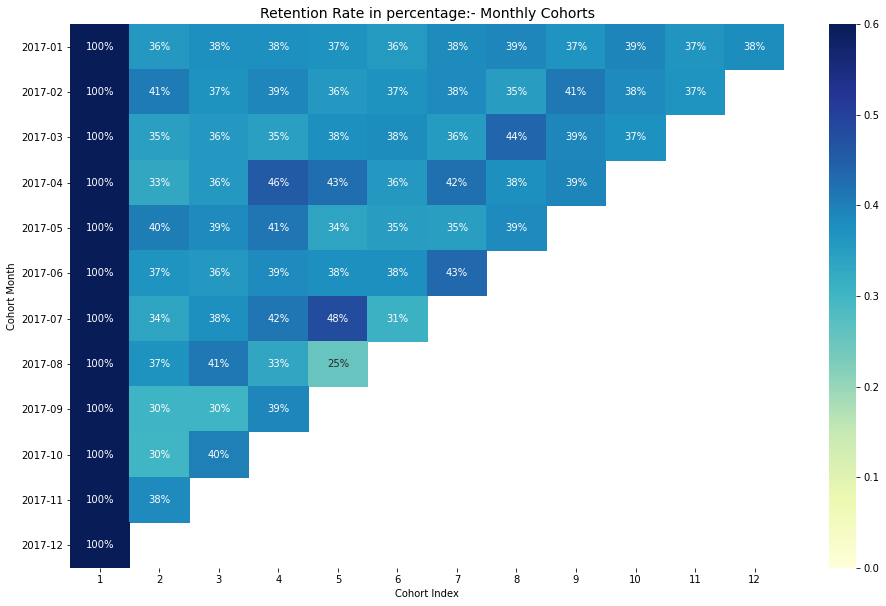

In [43]:
# Initialize the figure
plt.figure(figsize=(16, 10))

# Adding a title
plt.title('Retention Rate in percentage:- Monthly Cohorts', fontsize = 14)

# Creating the seaborn based heatmap
sns.heatmap(retention, annot=True, fmt= '.0%',cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

### Interpreting the retention rate

The most effective way to visualize and analyze cohort analysis data is through a heatmap, as we did above. It provides both the actual metric values and the color-coding to see the differences in the numbers visually.

> If you do not have basic understanding of heatmap, you can check out my blog [Exploratory Data Analysis for Beginner Using Python](https://medium.com/analytics-vidhya/exploratory-data-analysis-for-beginner-7488d587f1ec), where I have talked about heatmaps for beginners.


Here, We have 12 cohorts for each month and 12 cohort indexes. The darker the blue shades higher the values. Thus, if we see in 2017-07 cohort Month in 5th Cohort Index, we see the dark blue shade with  48% which means that 48% of cohorts that signed in July 2017 were active 5 months later.



This concludes our Cohort analysis for the retention rate. Similarly, we can perform cohort analysis for other business matrices.


As per our objective, we will see *average list  price monthly cohort * and  * average standard cost montly cohort. 

### Average standard cost monthly cohort

In [45]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = transaction_df.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the standard  average cost of the standard_cost column
cohort_data = grouping['standard_cost'].mean()

# Reset the index of cohort_data before pivot
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_order = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='standard_cost')

average_standard_cost = average_order.round(1)


In [46]:
average_standard_cost.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,553.0,576.6,576.4,579.1,567.1,581.6,561.5,512.4,567.8,531.1,520.5,549.2
2017-02-01,560.3,561.7,546.3,572.5,546.0,529.1,582.8,532.9,571.5,564.0,570.8,NaN
2017-03-01,534.4,611.6,623.0,551.4,521.4,583.7,564.1,580.3,530.0,510.5,NaN,NaN
2017-04-01,524.3,620.3,560.3,552.2,512.8,517.7,562.3,508.7,557.3,NaN,NaN,NaN
2017-05-01,604.0,557.4,589.0,576.2,615.4,496.9,593.3,600.9,NaN,NaN,NaN,NaN


In [47]:
average_standard_cost.index = average_standard_cost.index.strftime('%Y-%m')
average_standard_cost.index

Index(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object')

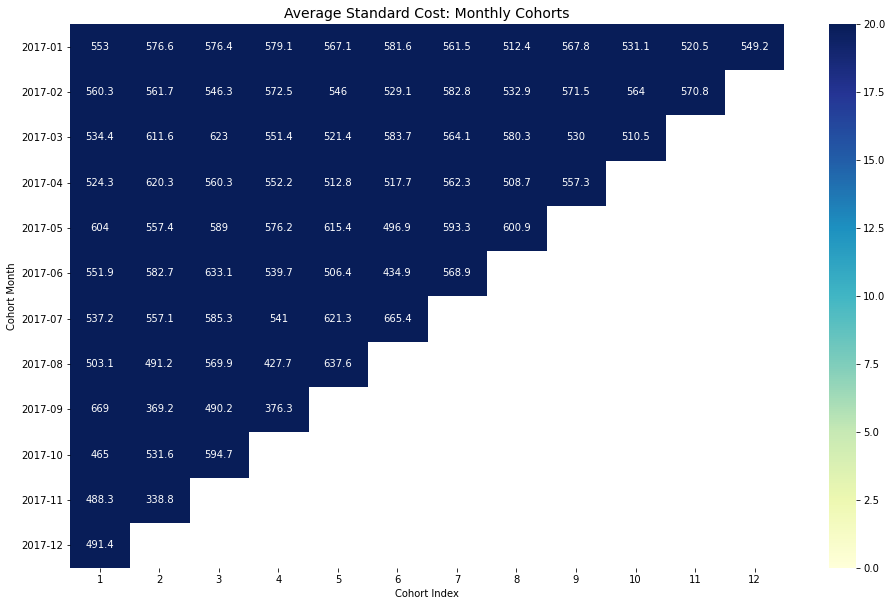

In [56]:
# Initialize the figure
plt.figure(figsize=(16, 10))

# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)

# Creating the heatmap
sns.heatmap(average_standard_cost, annot = True,vmin = 0.0, vmax =20,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()


Average standard cost for 1st month for the first cohort(2017-01) was 553 (1st colum of first row).


### Average list price monthly cohort

In [53]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = transaction_df.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the list price column
cohort_data = grouping['list_price'].mean()

# Reset the index of cohort_data before pivot
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_list = cohort_data.pivot(index='CohortMonth',
                                  columns='CohortIndex',
                                  values='list_price')

average_list_cost = average_list.round(1)

average_list_cost.head()

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1109.4,1141.0,1119.8,1120.3,1117.3,1125.3,1143.7,1066.8,1104.1,1101.9,1086.5,1055.9
2017-02-01,1088.1,1103.2,1115.4,1127.8,1126.7,1090.6,1150.1,1064.2,1090.6,1115.3,1098.2,NaN
2017-03-01,1071.2,1169.8,1155.1,1066.3,1046.2,1157.9,1136.9,1139.2,1123.4,1095.7,NaN,NaN
2017-04-01,1073.5,1159.5,1102.4,1081.9,1037.2,1099.2,1110.0,1085.2,1235.6,NaN,NaN,NaN
2017-05-01,1144.9,1079.4,1109.5,1144.3,1166.3,1138.8,1070.3,1220.9,NaN,NaN,NaN,NaN


In [54]:
average_list_cost.index = average_list_cost.index.strftime('%Y-%m')
average_list_cost.index

Index(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object')

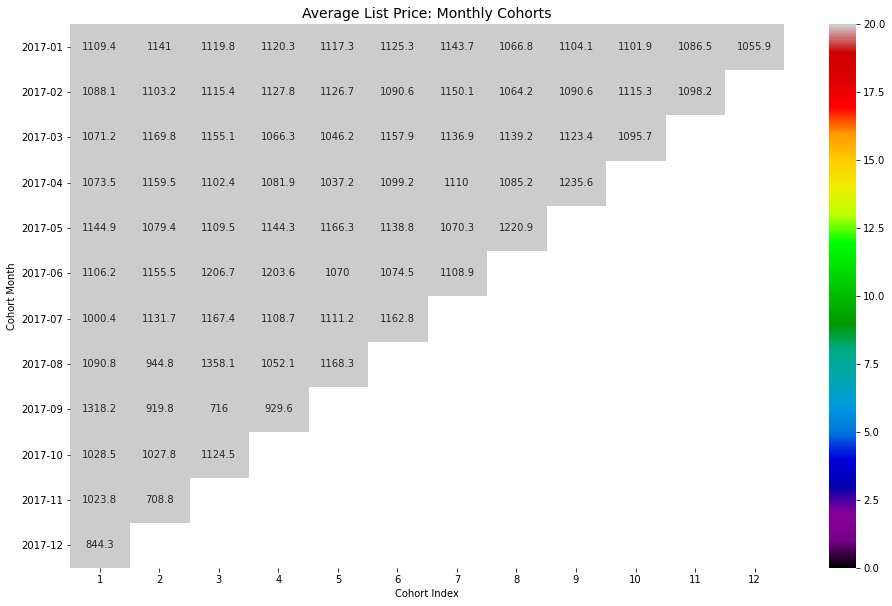

In [55]:

# Initialize the figure
plt.figure(figsize=(16, 10))

# Adding a title
plt.title('Average List Price: Monthly Cohorts', fontsize = 14)

# Creating the heatmap
sns.heatmap(average_list_cost, annot = True,vmin = 0.0, vmax =20,cmap="nipy_spectral", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()


Average list price for 1st month for the first cohort(2017-01) was 1109.4 (1st colum of first row).


***

Thus, We complete our Cohort Analysis, where you learned about basic and types of cohort analysis, performing time cohorts, working with pandas pivot, and create a retention table along with visualizing it. We also learned the way to explore other matrices.

> **Now, you can start creating exploring the  metrics that matters to your business on your own.**



<div class="alert alert-block alert-warning">
 &#9755; <b><a href="https://bit.ly/3hNtmBj" target=_blank>  Hands-on tutorial on cohorts analysis in Datacamp</a></b> 
    
</div>

# Extra Readings & Tutorials 🔖

1. [Exploratory Data Analysis for Beginner Using Python with Complete Guide and  Code
](https://medium.com/analytics-vidhya/exploratory-data-analysis-for-beginner-7488d587f1ec)

2. [Build Your First Data Visualization Web App in Python Using Streamlit](https://towardsdatascience.com/build-your-first-data-visualization-web-app-in-python-using-streamlit-37e4c83a85db)

3. [The Ultimate Guide To SMS: Spam or Ham Detector Using Python(AN APPROACH WITH ARTIFICIAL INTELLIGENCE)](https://towardsdatascience.com/the-ultimate-guide-to-sms-spam-or-ham-detector-aec467aecd85)

4. [8 Tips for the Better Digital Version of Yourself: No Social media or digital addiction any more](https://medium.com/@maladeep.upadhaya/data-detox-c1fe684164d2)

5. [Surprisingly Effective Way To Name Matching In Python: Data Matching, Fuzzy Matching, Data Deduplication](https://towardsdatascience.com/surprisingly-effective-way-to-name-matching-in-python-1a67328e670e)


### Click on the medium logo to check my other articles that might help you excel in your data science career.



__[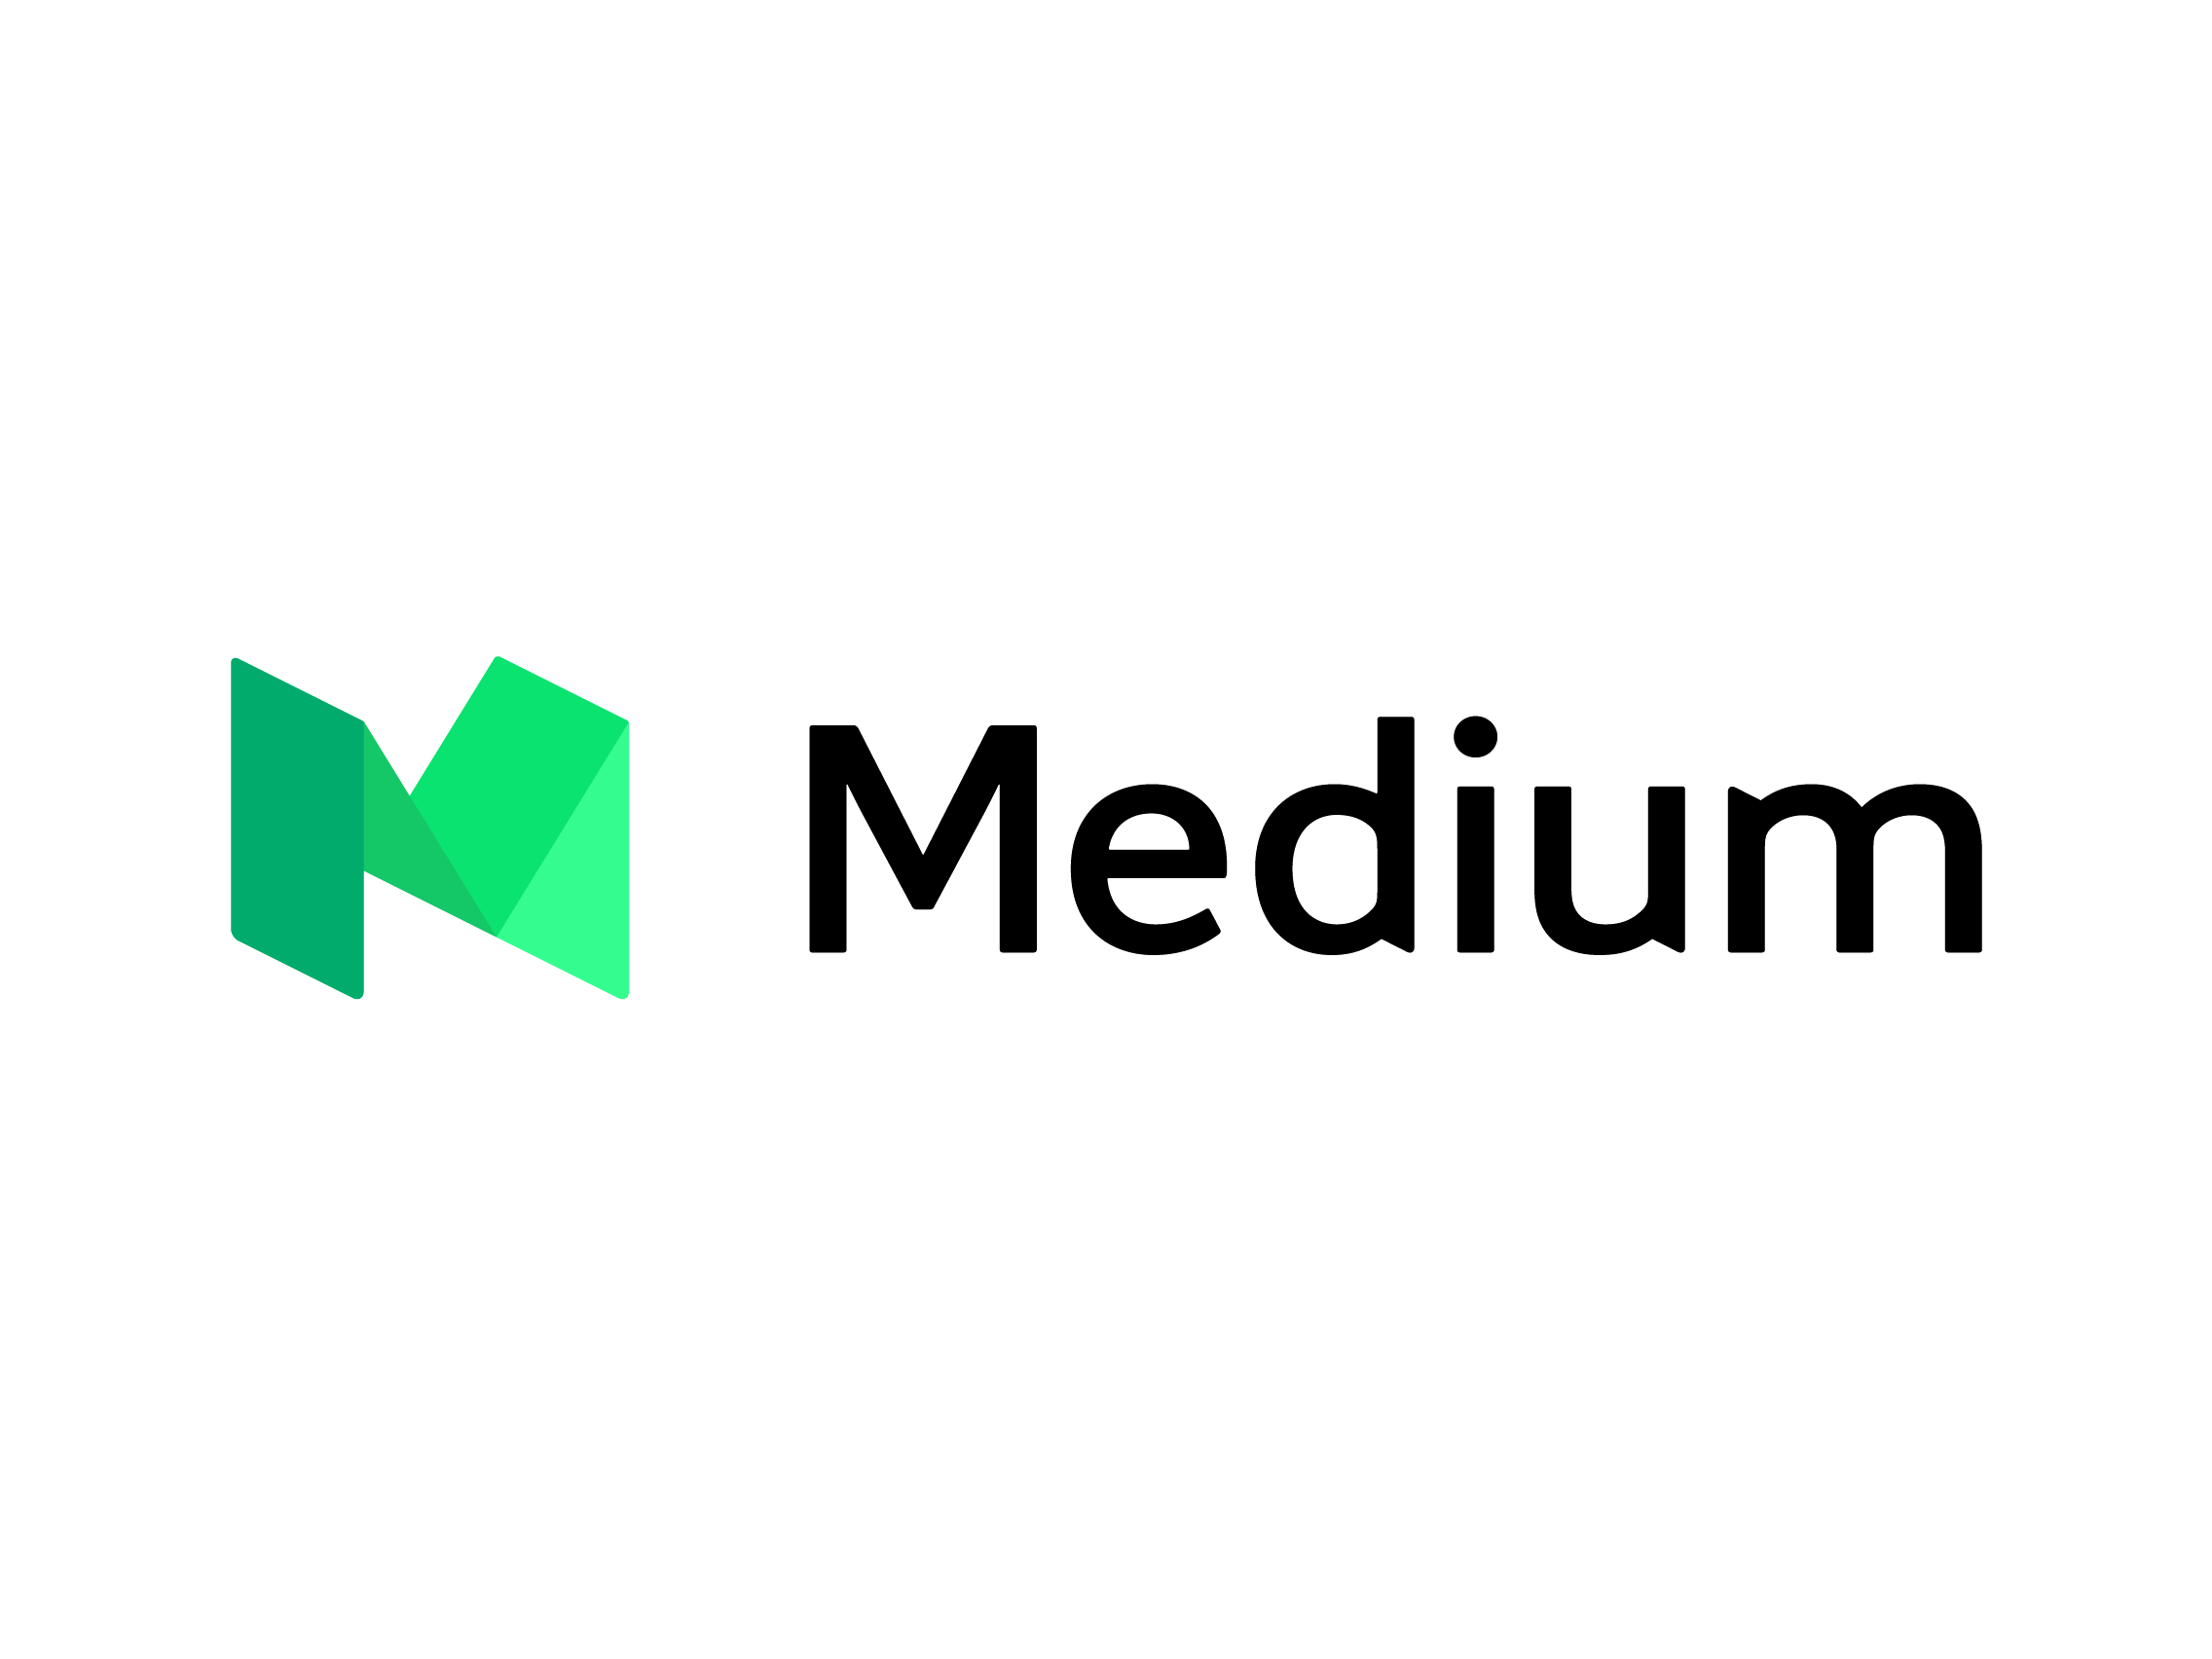](https://medium.com/@maladeep.upadhaya)__
